In [3]:
#mass flow rate measurement with different equipments
import csv
with open("./DATA.csv") as file :
    csv_reader = csv.reader(file, delimiter = " " , quotechar = "|")
    for row in csv_reader :
        print(",".join(row))

   



FileNotFoundError: [Errno 2] No such file or directory: './DATA.csv'

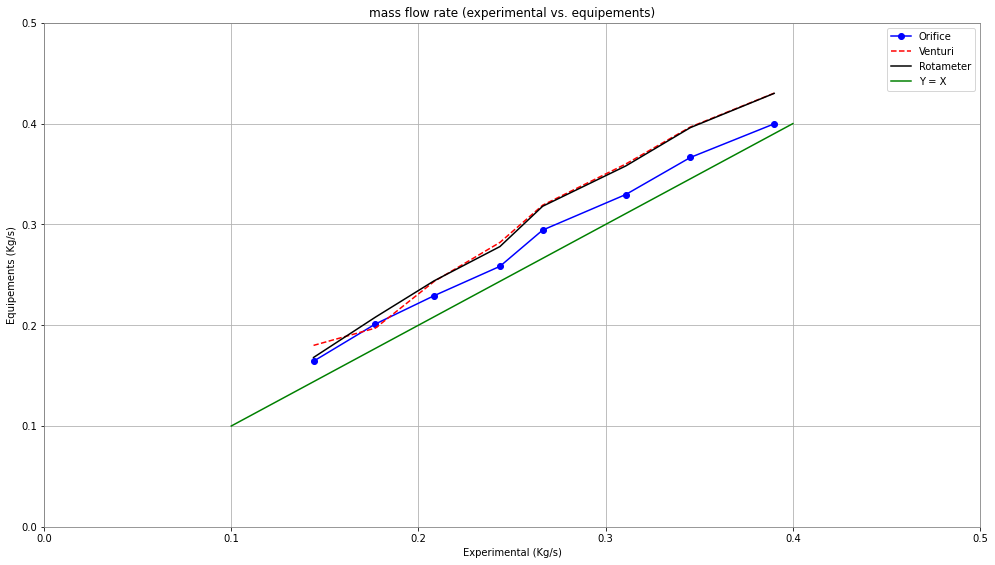

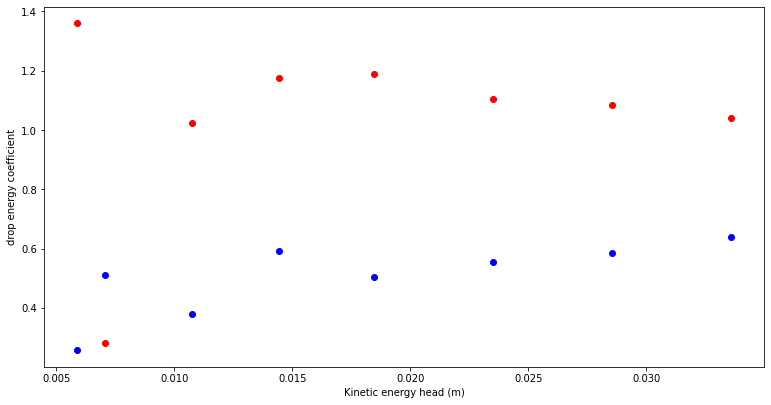

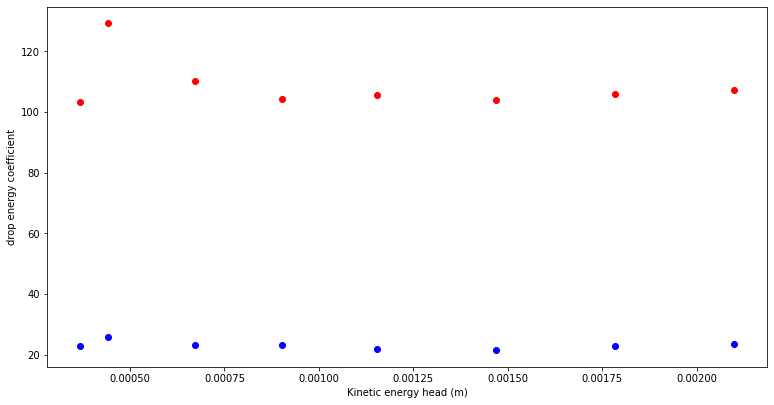

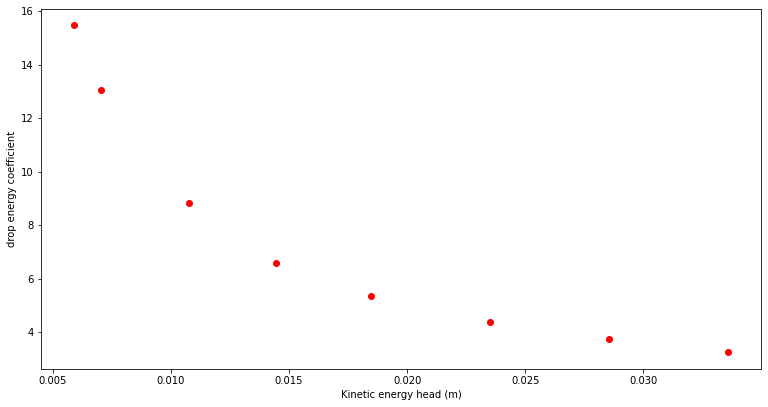

In [1]:
#mass flow rate measurement with different equipments

import csv
import numpy as np

massflowrate_exp =[]
massflowrate_Venturi =[]
massflowrate_Orifice =[]
massflowrate_Rotameter =[]

Venturi_drop = []
Orifice_drop = []
Rotameter_drop = []
Diffuser_drop = []
Elbow_drop = []

delta_H_AC_list = []
delta_H_EF_list = []
delta_H_HI_list = []
delta_H_CD_list = []
delta_H_GH_list = []

#V**2 / 2G
A_list = []
E_list = []
H_list = []
C_list = []
G_list = []

with open("DATA1.csv") as file :
    csv_reader = csv.DictReader(file)
   
    for key in csv_reader :
        

        #determining mass flow rate
        exp_eq = float(key["m (Kg)"]) / float(key["t (s)"])
        massflowrate_exp.append(exp_eq)
        venturi_eq = (0.201) * (22.905*(int(key["A"])/1000 - int(key["B"])/1000))**0.5
        massflowrate_Venturi.append(venturi_eq)
        orifice_eq =(0.188) * (20.0962 *(int(key["E"])/1000 - int(key["F"])/1000))**0.5
        massflowrate_Orifice.append(orifice_eq)
        massflowrate_Rotameter.append((float(key["Rotameter scale (cm)"])+2) / 50)


        #determining drop coefficients


        #Venturi
        Venturi_drop.append((int(key["A"])/1000 - int(key["C"])/1000) / (0.168 * (int(key["A"])/1000 - int(key["B"])/1000)))

        #Orifice
        Orifice_drop.append((16*(int(key["E"])/1000 - int(key["F"])/1000)) / (0.168 * (int(key["A"])/1000 - int(key["B"])/1000)))

        #Rotameter
        Rotameter_drop.append((int(key["H"])/1000-int(key["I"])/1000) / (0.168 * (int(key["A"])/1000 - int(key["B"])/1000)))

        #Diffuser
        Diffuser_drop.append(((int(key["C"])/1000 - int(key["D"])/1000) + 0.168 * (int(key["A"])/1000 - int(key["B"])/1000)*(1 - 1/16)) / (0.168 * (int(key["A"])/1000 - int(key["B"])/1000)))

        #Elbow
        Elbow_drop.append((int(key["G"])/1000 - int(key["H"])/1000 + (1/16)*(1 - 1/16)*(0.168)*(int(key["A"])/1000 - int(key["B"])/1000)) / ((1/16)*(0.168)*(int(key["A"])/1000 - int(key["B"])/1000)))

        #Delta_H

        delta_H_AC = int(key["A"])/1000 - int(key["C"])/1000
        delta_H_AC_list.append(delta_H_AC)
        delta_H_EF = int(key["E"])/1000 - int(key["F"])/1000
        delta_H_EF_list.append(delta_H_EF)
        delta_H_HI = int(key["H"])/1000 - int(key["I"])/1000
        delta_H_HI_list.append(delta_H_HI)
        delta_H_CD = ((int(key["C"])/1000 - int(key["D"])/1000) + 0.168 * (int(key["A"])/1000 - int(key["B"])/1000)*(1 - 1/16))
        delta_H_CD_list.append(delta_H_CD)
        delta_H_GH = (int(key["G"])/1000 - int(key["H"])/1000 + (1/16)*(1 - 1/16)*(0.168)*(int(key["A"])/1000 - int(key["B"])/1000))
        delta_H_GH_list.append(delta_H_GH)

        #V**2 / 2G

        A = (0.168)*(int(key["A"])/1000 - int(key["B"])/1000)
        A_list.append(A)
        E = (1/16)*(0.168)*(int(key["A"])/1000 - int(key["B"])/1000)
        E_list.append(E)
        H = (0.168)*(int(key["A"])/1000 - int(key["B"])/1000)
        H_list.append(H)
        C = (0.168)*(int(key["A"])/1000 - int(key["B"])/1000)
        C_list.append(C)
        G = (1/16)*(0.168)*(int(key["A"])/1000 - int(key["B"])/1000)
        G_list.append(G)
     



from matplotlib import pyplot as plt 


#Question 2

fig = plt.figure(figsize = (13,7))
a = fig.add_axes([0,0,1,1])
x = [0.1 , 0.4]
a.plot(massflowrate_exp , massflowrate_Orifice ,"bo-" , label = "Orifice")
a.plot(massflowrate_exp , massflowrate_Venturi , "r--" , label = "Venturi" )
a.plot(massflowrate_exp , massflowrate_Rotameter ,"black" , label = "Rotameter" )

a.plot(x ,x ,"green" , label = "Y = X")
a.spines['left'].set_color('gray')
a.spines['top'].set_color('gray')
a.spines['right'].set_color('gray')
a.spines['bottom'].set_color('gray')

plt.legend()
#a.set_xlim(0 , 0.5)
#a.set_ylim(0 , 0.5)
plt.title("mass flow rate (experimental vs. equipements)")
plt.xlabel("Experimental (Kg/s)")
plt.ylabel("Equipements (Kg/s)")
plt.xlim(0 , 0.5)
plt.ylim(0 , 0.5)
plt.xscale("linear")
plt.yscale("linear")
plt.grid(True)
plt.show()


#Question 3

# Venturi and Diffuser
fig = plt.figure(figsize = (10,5))
a = fig.add_axes([0,0,1,1])
   
a.scatter(A_list , Venturi_drop , c = "r")
a.scatter(A_list , Diffuser_drop , c= "b" )
plt.xlabel("Kinetic energy head (m)")
plt.ylabel("drop energy coefficient")
plt.show()


#Orifice and Elbow
fig = plt.figure(figsize = (10,5))
a = fig.add_axes([0,0,1,1])
   
a.scatter(E_list , Orifice_drop , c = "r")
a.scatter(E_list , Elbow_drop , c= "b" )
plt.xlabel("Kinetic energy head (m)")
plt.ylabel("drop energy coefficient")
plt.show()

#Rotameter
fig = plt.figure(figsize = (10,5))
a = fig.add_axes([0,0,1,1])
   
a.scatter(H_list , Rotameter_drop , c = "r")
plt.xlabel("Kinetic energy head (m)")
plt.ylabel("drop energy coefficient")
plt.show()
















        


    
        



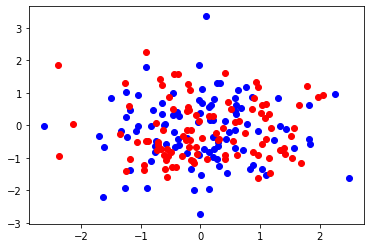

In [4]:
import scipy, pylab
ax = pylab.subplot(111)
ax.scatter(scipy.randn(100), scipy.randn(100), c='b')
ax.scatter(scipy.randn(100), scipy.randn(100), c='r')
ax.figure.show()

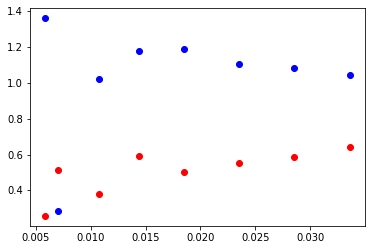

In [5]:
import scipy, pylab
ax = pylab.subplot(111)
ax.scatter(A_list , Venturi_drop , c = "b")
ax.scatter(A_list , Diffuser_drop , c = "r")

ax.figure.show()


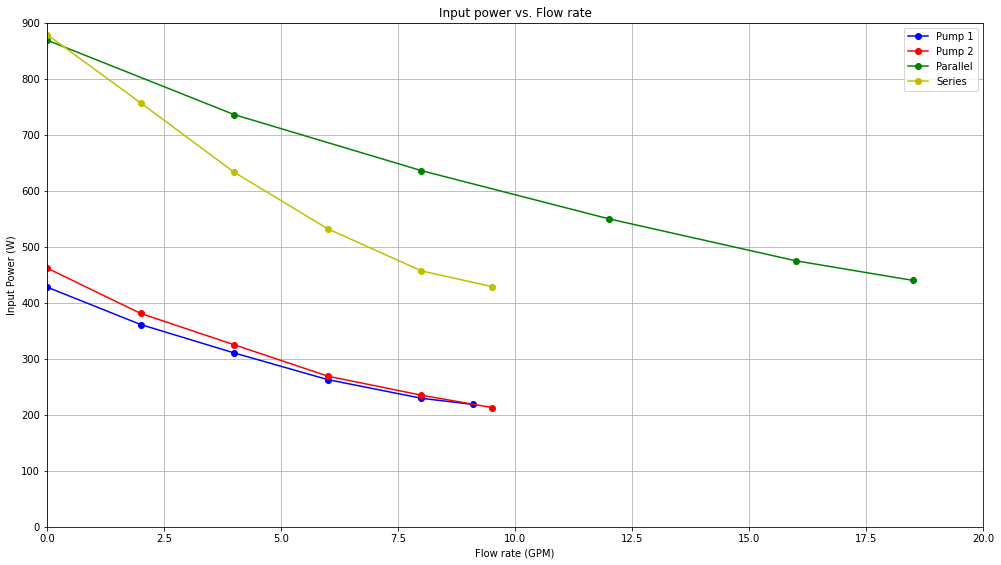

In [1]:
#report 2 (Series and parallel pumps)

import csv
import numpy as np 

#pump1 one and pump2 off 
Pi_1 = []
Q_1 = []
#pump2 one and pump1 off 
Pi_2 = []
Q_2 = []
#Parallel connection
Pi_3 = []
Q_3 = []
#Series connection 
Pi_4 = []
Q_4 = []

with open("/Users/mohammad/Desktop/Python/AZ sayalat/Series and Parallel pumps/Data2.csv") as file :
    csv_reader = csv.DictReader(file)
    for key in csv_reader:
    
        #flow rates
        Q_1.append(float(key["Q1"]))
        Q_2.append(float(key["Q2"]))
        Q_3.append(float(key["Q3"]))
        Q_4.append(float(key["Q4"]))
        #input powers
        Pi_1.append(float(key["Pi1"]))
        Pi_2.append(float(key["Pi2"]))
        Pi_3.append(float(key["Pi3"]))
        Pi_4.append(float(key["Pi4"]))

from matplotlib import pyplot as plt 

#Question 2
#Input power and flow rate 
fig = plt.figure(figsize = (13,7))
a = fig.add_axes([0,0,1,1])

a.plot(Q_1 , Pi_1 , "bo-" , label = "Pump 1")
a.plot(Q_2 , Pi_2 , "ro-" , label = "Pump 2")
a.plot(Q_3 , Pi_3 , "go-" , label = "Parallel")
a.plot(Q_4 , Pi_4 , "yo-" , label = "Series")


plt.legend()

plt.title("Input power vs. Flow rate")
plt.xlabel("Flow rate (GPM)")
plt.ylabel("Input Power (W)")
plt.xlim(0 , 20)
plt.ylim(0 , 900)
plt.xscale("linear")
plt.yscale("linear")
plt.grid(True)
plt.show()


